In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jeeyoung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

In [48]:
df_combined = pd.read_csv('full_listings.csv')

C:\Users\Jeeyoung\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
# Combine the "name" and "summary" columns
df_combined['text'] = df_combined['name'] + ' ' + df_combined['summary']

In [50]:
df_combined.head()

,id,name,summary,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,xl_picture_url,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,country_code,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,text
0,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",I am a Sound Therapy Practitioner and Kundalin...,"Make yourself at home, respect the space and t...",NaN,NaN,NaN,2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,85%,NaN,0,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, NY, United States",Midtown,Midtown,Manhattan,New York,NY,10018,"New York, NY",US,40.75362,-73.98377,f,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225.0,1995.0,NaN,$350.00,$95.00,1,$0.00,10,1125,10,10,1125,1125,10.0,1125.0,2 weeks ago,t,1,1,1,1,2019-12-07,48,7,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,0,f,strict_14_with_grace_period,t,t,1,1,0,0,0.39,"Skylit Midtown Castle Beautiful, spacious skyl..."
1,3831,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,You will have exclusive use of and access to: ...,"We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,NaN,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,100%,NaN,0,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,Brooklyn,Brooklyn,NY,11238,"Brooklyn, NY",US,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89.0,575.0,2100.0,$500.00,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,2 weeks ago,t,1,1,1,1,2019-12-07,295,75,2014-09-30,2019-11-22,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,0,f,moderate,f,f,1,1,0,0,4.67,Cozy Entire Floor of Brownstone Urban retreat:...
2,5099,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,Read My Full Listing For All Information. New ...,From the apartment is a 10 minute walk to Gran...,I will meet you upon arri

In [51]:
cols = df_combined.columns.tolist()

In [52]:
# Reorder the columns - move "text" up front
cols = [cols[0]] + cols[-1:] + cols[1:95] 
df_combined = df_combined[cols]

In [53]:
df_combined.head(1)

,id,text,name,summary,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,xl_picture_url,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,country_code,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,"Skylit Midtown Castle Beautiful, spacious skyl...",Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",I am a Sound Therapy Practitioner and Kundalin...,"Make yourself at home, respect the space and t...",NaN,NaN,NaN,2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,85%,NaN,0,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, NY, United States",Midtown,Midtown,Manhattan,New York,NY,10018,"New York, NY",US,40.75362,-73.98377,f,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225.0,1995.0,NaN,$350.00,$95.00,1,$0.00,10,1125,10,10,1125,1125,10.0,1125.0,2 weeks ago,t,1,1,1,1,2019-12-07,48,7,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,0,f,strict_14_with_grace_period,t,t,1,1,0,0,0.39


In [10]:
# To Colab
df_combined.to_csv('combined_listings.csv', index=False)

In [11]:
# files.download('combined_listings2.csv')

In [12]:
df_combined.shape

(50599, 96)

**Word Frequency Script**

In [0]:
#!/usr/bin/python2.7
import csv
from nltk.corpus import stopwords
import re
import string
from collections import defaultdict

stop = stopwords.words('english')

inter1 = []
sentences_all = []
sentences_clean = []
sentences_unpun = []

dictionary1 = {}
d2_dict = defaultdict(dict)

with open('combined_listings2.csv') as f:
    rows = csv.reader(f, delimiter = ',')
    for row in rows:
        inter1.append(row[2])

for row in inter1:
    sentences = re.split(r' *[\.\?!][\'"\)\]]* *', row)

    for s in sentences:
        in1 = ''.join(s)
        out = re.sub('[%s]' % re.escape(string.punctuation), '', in1.lower())
        sentences_all.append(out)

for sentence in sentences_all:
    s = []
    for i in sentence.split():
        if i not in stop:
            s.append(i)
    sentences_clean.append(s)

for sentence in sentences_clean:
    #print sentence
    for word in sentence:
        dictionary1[word] = 0

for sentence in sentences_clean:
    for word in sentence:
        dictionary1[word] = dictionary1[word] + 1

for sentence in sentences_clean:
    for word in sentence:
        for word2 in sentence:
            if(word != word2):
                d2_dict[word][word2] = 0

for sentence in sentences_clean:
    for word in sentence:
        for word2 in sentence:
            if(word != word2):
                d2_dict[word][word2] = d2_dict[word][word2] + 1

writer = csv.writer(open('combined_word_freq2.csv', 'w'))
for key, value in dictionary1.items():
    writer.writerow([key, value])

writer = csv.writer(open('combined_word_pair_freq2.csv', 'w'))
for key1, value1 in d2_dict.items():
    for key2, value2 in d2_dict[key1].items():
        writer.writerow([key1, key2, value2])
print("written to combined_word_freq.csv and combined_word_pair_freq.csv")


written to combined_word_freq.csv and combined_word_pair_freq.csv


In [0]:
files.download('combined_word_freq2.csv')

**Adding columns With Top 18 Adjectives From "text" Column**


In [54]:
adjectives = ['private',
'new',
'spacious',
'cozy',
'great',
'beautiful',
'heart',
'large',
'quiet',
'clean',
'modern',
'comfortable',
'perfect',
'best',
'sunny',
'renovated',
'bright',
'available']

In [55]:
df_adjectives = df_combined.copy()

In [56]:
# if the adjective exists in the text column = 1, if not 0
for adj in adjectives:
    df_adjectives[adj] = np.where(df_adjectives['text'].str.contains(adj),1,0)

In [57]:
df_adjectives.head(10)

,id,text,name,summary,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,xl_picture_url,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,country_code,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,private,new,spacious,cozy,great,beautiful,heart,large,quiet,clean,modern,comfortable,perfect,best,sunny,renovated,bright,available
0,2595,"Skylit Midtown Castle Beautiful, spacious skyl...",Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",I am a Sound Therapy Practitioner and Kundalin...,"Make yourself at home, respect the space and t...",NaN,NaN,NaN,2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,85%,NaN,0,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, NY, United States",Midtown,Midtown,Manhattan,New York,NY,10018,"New York, NY",US,40.75362,-73.98377,f,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225.0,1995.0,NaN,$350.00,$95.00,1,$0.00,10,1125,10,10,1125,1125,10.0,1125.0,2 weeks ago,t,1,1,1,1,2019-12-07,48,7,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,0,f,strict_14_with_grace_period,t,t,1,1,0,0,0.39,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,3831,Cozy Entire Floor of Brownstone Urban retreat:...,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,You will have exclusive use of and access to: ...,"We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,NaN,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,100%,NaN,0,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,Brooklyn,Brooklyn,NY,11238,"Brooklyn, NY",US,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89.0,575.0,2100.0,$500.00,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,2 weeks ago,t,1,1,1,1,2019-12-07,295,75,2014-09-30,2019-11-22,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,0,f,moderate,f,f,1,1,0,0,4.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,5099,Large Cozy 1 BR Apartment In Midtown East My l...,Large Cozy 1 BR Apa

**Price & 18 Adjectives Graph**

In [58]:
adj_df = df_adjectives.copy()
adj_df = adj_df[['private',
'new',
'spacious',
'cozy',
'great',
'beautiful',
'heart',
'large',
'quiet',
'clean',
'modern',
'comfortable',
'perfect',
'best',
'sunny',
'renovated',
'bright',
'available',
'price']]

In [59]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import lightgbm as lgbm

In [60]:
X = adj_df.drop('price', axis='columns').values
y = adj_df['price'].values

const_params = {
    'objective':                      'regression', 
    'metric':                         'rmse',
    'n_jobs':                         -1
}

tuning_parameters = {
    'learning_rate':                  [0.11, 0.115, 0.12], 
    'max_depth':                      [20], 
    'n_estimators':                   [275, 280, 285], 
    'random_state':                   [0]
}

def rmse(y_true, y_pred): return abs(np.sqrt(mean_squared_error(y_true, y_pred)))
scorer = make_scorer(rmse, greater_is_better=False)

grid = GridSearchCV(lgbm.LGBMRegressor(**const_params), 
                    tuning_parameters, 
                    cv=StratifiedKFold(5), 
                    scoring=scorer, 
                    n_jobs=-1)

grid.fit(X, y)

print(f'Best parameters {grid.best_params_}.')
print(f'Best RMSE is {-1*grid.best_score_}.')

C:\Users\Jeeyoung\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Jeeyoung\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters {'learning_rate': 0.11, 'max_depth': 20, 'n_estimators': 275, 'random_state': 0}.
Best RMSE is 344.79558749657923.


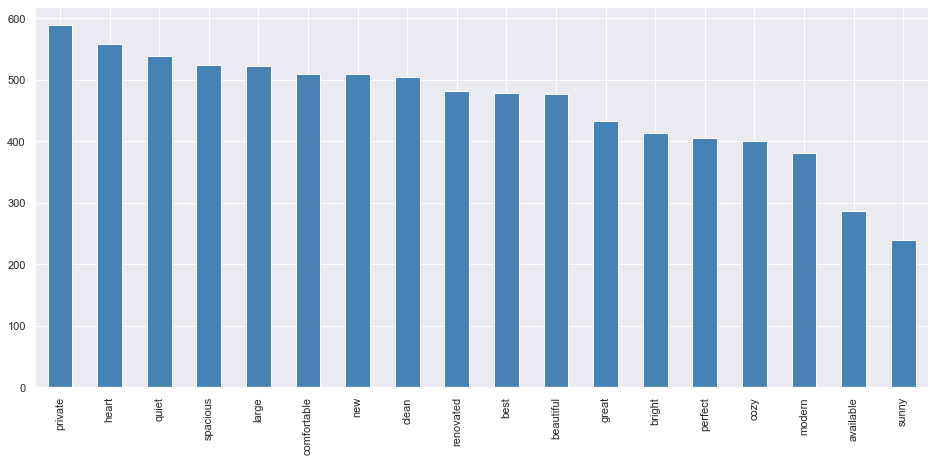

In [66]:
(pd.Series(grid.best_estimator_.feature_importances_, index=adj_df.drop('price', axis='columns').columns.tolist())
.sort_values(ascending=False)
.plot.bar(color='steelblue', figsize=(16, 7))).figure.savefig("price&adjectives");

**Price & 18 Adjectives Linear Regression**

In [62]:
from sklearn import linear_model
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8)})

In [63]:
import statsmodels.api as sm

X = adj_df.drop('price', axis='columns')
y = adj_df['price']

model_price = sm.OLS(y, X).fit()
model_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.071
Model:                            OLS   Adj. R-squared (uncentered):              0.071
Method:                 Least Squares   F-statistic:                              215.7
Date:                Sun, 15 Dec 2019   Prob (F-statistic):                        0.00
Time:                        18:51:59   Log-Likelihood:                     -3.7080e+05
No. Observations:               50599   AIC:                                  7.416e+05
Df Residuals:                   50581   BIC:                                  7.418e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
private        52.1007      4.041     12.894      0.000      44.181      60.020
new            41.3288      5.452      7.581      0.000      30.643      52.014
spacious       33.6135      5.100      6.591      0.000      23.618      43.609
cozy          -12.8743      5.492     -2.344      0.019     -23.640      -2.109
great          40.8597      4.829      8.461      0.000      31.394      50.325
beautiful      33.7477      5.147      6.557      0.000      23.659      43.836
heart          99.9319      4.474     22.337      0.000      91.163     108.701
large          44.3064      5.456      8.121      0.000      33.613      54.999
quiet          34.3750      4.817      7.137      0.000      24.935      43.815
clean           9.9401      5.284      1.881      0.060      -0.416      20.297
modern         40.3767      6.390      6.319      0.000      27.853      52.901
comfortable    -2.2325      5.893     -0.379      0.705     -13.782       9.317
perfect        21.7018      6.211      3.494      0.000       9.529      33.875
best           43.0338      5.852      7.354      0.000      31.564      54.504
sunny        -101.0127      7.639    -13.223      0.000    -115.985     -86.040
renovated       1.7672      6.196      0.285      0.775     -10.378      13.912
bright        -70.8349      7.703     -9.196      0.000     -85.932     -55.738
available      -8.8747      6.100     -1.455      0.146     -20.831       3.082
==============================================================================
Omnibus:                   110366.804   Durbin-Watson:                   1.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        559204786.736
Skew:                          20.003   Prob(JB):                         0.00
Kurtosis:                     516.459   Cond. No.                         5.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
coeff = model_price.params
data = [[x, y] for x,y in zip(coeff.values, coeff.index.tolist())]
coeff_df = pd.DataFrame(data, columns=['values','adjectives'])
coeff_df = coeff_df.sort_values(by=['values'],ascending=False)
coeff_df

,values,adjectives
6,99.931865,heart
0,52.100727,private
7,44.306376,large
13,43.033844,best
1,41.328842,new
4,40.859730,great
10,40.376713,modern
8,34.375009,quiet
5,33.747715,beautiful
2,33.613540,spacious


[Text(0, 0, 'heart'),
 Text(0, 0, 'private'),
 Text(0, 0, 'large'),
 Text(0, 0, 'best'),
 Text(0, 0, 'new'),
 Text(0, 0, 'great'),
 Text(0, 0, 'modern'),
 Text(0, 0, 'quiet'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'spacious'),
 Text(0, 0, 'perfect'),
 Text(0, 0, 'clean'),
 Text(0, 0, 'renovated'),
 Text(0, 0, 'comfortable'),
 Text(0, 0, 'available'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'bright'),
 Text(0, 0, 'sunny')]

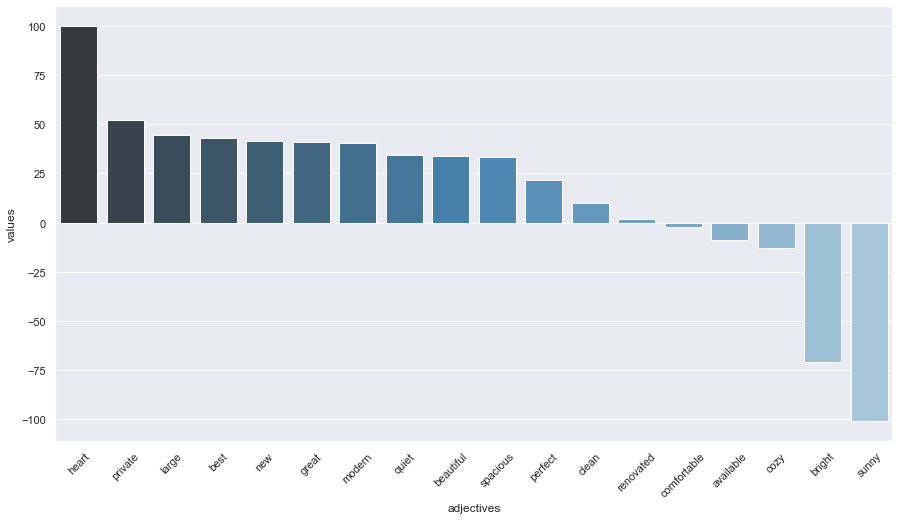

In [65]:
ax = sns.barplot(x = 'adjectives', y = 'values', data = coeff_df, palette = sns.color_palette('Blues_d',18))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

**Number of Reviews & 18 Adjectives Graph**

In [67]:
adj_df2 = df_adjectives.copy()
adj_df2 = adj_df2[['private',
'new',
'spacious',
'cozy',
'great',
'beautiful',
'heart',
'large',
'quiet',
'clean',
'modern',
'comfortable',
'perfect',
'best',
'sunny',
'renovated',
'bright',
'available',
'number_of_reviews']]

In [68]:
X = adj_df2.drop('number_of_reviews', axis='columns').values
y = adj_df2['number_of_reviews'].values

const_params = {
    'objective':                      'regression', 
    'metric':                         'rmse',
    'n_jobs':                         -1
}

tuning_parameters = {
    'learning_rate':                  [0.11, 0.115, 0.12], 
    'max_depth':                      [20], 
    'n_estimators':                   [275, 280, 285], 
    'random_state':                   [0]
}

def rmse(y_true, y_pred): return abs(np.sqrt(mean_squared_error(y_true, y_pred)))
scorer = make_scorer(rmse, greater_is_better=False)

grid = GridSearchCV(lgbm.LGBMRegressor(**const_params), 
                    tuning_parameters, 
                    cv=StratifiedKFold(5), 
                    scoring=scorer, 
                    n_jobs=-1)

grid.fit(X, y)

print(f'Best parameters {grid.best_params_}.')
print(f'Best RMSE is {-1*grid.best_score_}.')

C:\Users\Jeeyoung\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Jeeyoung\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters {'learning_rate': 0.11, 'max_depth': 20, 'n_estimators': 275, 'random_state': 0}.
Best RMSE is 46.95822063979861.


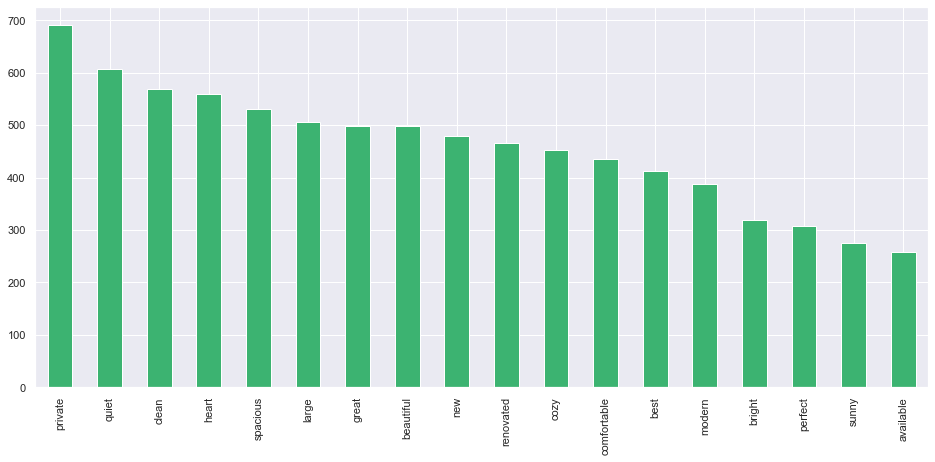

In [69]:
(pd.Series(grid.best_estimator_.feature_importances_, index=adj_df.drop('price', axis='columns').columns.tolist())
.sort_values(ascending=False)
.plot.bar(color='mediumseagreen', figsize=(16, 7)));

**Number of Reviews & 18 Adjectives Liner Regression**

In [70]:
X = adj_df2.drop('number_of_reviews', axis='columns')
y = adj_df2['number_of_reviews']

model_reviews = sm.OLS(y, X).fit()
predictions = model_reviews.predict(X) 
model_reviews.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      number_of_reviews   R-squared (uncentered):                   0.112
Model:                            OLS   Adj. R-squared (uncentered):              0.112
Method:                 Least Squares   F-statistic:                              354.6
Date:                Sun, 15 Dec 2019   Prob (F-statistic):                        0.00
Time:                        18:58:21   Log-Likelihood:                     -2.7009e+05
No. Observations:               50599   AIC:                                  5.402e+05
Df Residuals:                   50581   BIC:                                  5.404e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
private        20.5818      0.552     37.280      0.000      19.500      21.664
new             4.8549      0.745      6.517      0.000       3.395       6.315
spacious        3.3398      0.697      4.793      0.000       1.974       4.706
cozy            5.1655      0.750      6.883      0.000       3.695       6.636
great           6.2743      0.660      9.508      0.000       4.981       7.568
beautiful       4.3967      0.703      6.252      0.000       3.018       5.775
heart           7.9026      0.611     12.928      0.000       6.704       9.101
large           2.0658      0.745      2.771      0.006       0.605       3.527
quiet           9.5265      0.658     14.475      0.000       8.237      10.816
clean           6.8323      0.722      9.463      0.000       5.417       8.247
modern         -3.8878      0.873     -4.453      0.000      -5.599      -2.177
comfortable     4.9265      0.805      6.119      0.000       3.348       6.505
perfect        -0.7586      0.849     -0.894      0.371      -2.422       0.905
best           -0.7763      0.800     -0.971      0.332      -2.344       0.791
sunny         -13.4695      1.044    -12.905      0.000     -15.515     -11.424
renovated       4.9560      0.847      5.854      0.000       3.297       6.615
bright        -12.3223      1.052    -11.708      0.000     -14.385     -10.259
available      -1.2638      0.834     -1.516      0.129      -2.898       0.370
==============================================================================
Omnibus:                    36529.550   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           726861.856
Skew:                           3.306   Prob(JB):                         0.00
Kurtosis:                      20.351   Cond. No.                         5.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0, 0, 'private'),
 Text(0, 0, 'quiet'),
 Text(0, 0, 'heart'),
 Text(0, 0, 'clean'),
 Text(0, 0, 'great'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'renovated'),
 Text(0, 0, 'comfortable'),
 Text(0, 0, 'new'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'spacious'),
 Text(0, 0, 'large'),
 Text(0, 0, 'perfect'),
 Text(0, 0, 'best'),
 Text(0, 0, 'available'),
 Text(0, 0, 'modern'),
 Text(0, 0, 'bright'),
 Text(0, 0, 'sunny')]

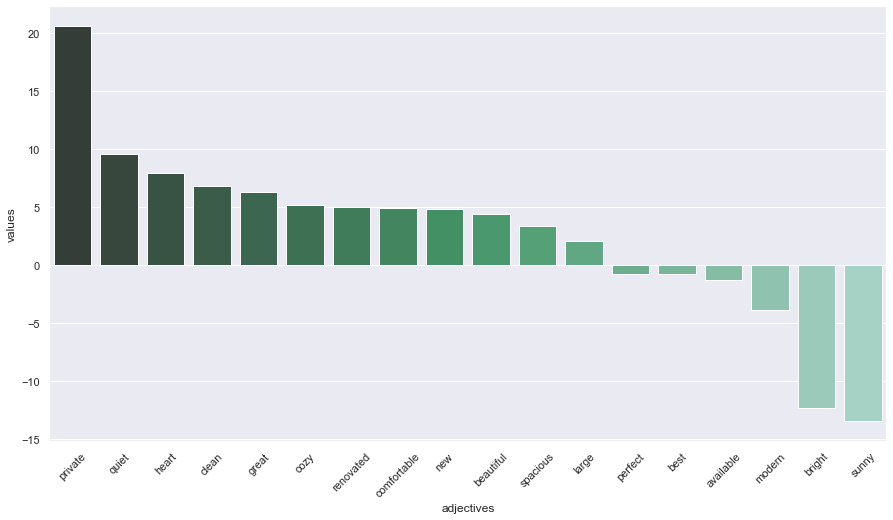

In [71]:
coeff = model_reviews.params
data = [[x, y] for x,y in zip(coeff.values, coeff.index.tolist())]
coeff_df = pd.DataFrame(data, columns=['values','adjectives'])
coeff_df = coeff_df.sort_values(by=['values'],ascending=False)
coeff_df

ax = sns.barplot(x = 'adjectives', y = 'values', data = coeff_df, palette = sns.color_palette('BuGn_d',18))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [47]:
coeff_df

,values,adjectives
0,20.581788,private
8,9.526506,quiet
6,7.902639,heart
9,6.832306,clean
4,6.274286,great
3,5.165531,cozy
15,4.956015,renovated
11,4.926489,comfortable
1,4.854929,new
5,4.396724,beautiful
